In [1]:
# Importing the various libraries for data cleaning, preprocessing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the csv file using pd.read
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn_G9_new_17.csv")
df.head()

# Observation: The head and columns of the dataset shows that the given dataset seems to be a tellephone communication customer churn dataset.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN,NaN,NaN
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,NaN,NaN,NaN
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN,NaN,NaN
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN,NaN
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN,NaN,NaN


In [3]:
# cheching for the number of columns and rows of the dataset
df.shape
# Observation: The data contain 7046 rows and 24 columns

(7046, 24)

In [4]:
#checking for dataset information
df.info
#Observation : the dataset is a dataframe with some missing values and indexing starting from 0 to 7045

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No     1.0   
1     5575-GNVDE    Male              0      No         No    34.0   
2     3668-QPYBK    Male              0      No         No     2.0   
3     7795-CFOCW    Male              0      No         No    45.0   
4     9237-HQITU  Female              0      No         No     2.0   
...          ...     ...            ...     ...        ...     ...   
7041  8361-LTMKD    Male              1     Yes         No     4.0   
7042  3186-AJIEK    Male              0      No         No    66.0   
7043  8865-TNMNX    Male              0     Yes        Yes    10.0   
7044  9489-DEDVP  Female              0     Yes        Yes    70.0   
7045  9867-JCZSP  Female              0     Yes        Yes    17.0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0              No  No phone service           

In [5]:
# checking for columns
df.columns
# Observations: The data has 24 columns with 3 unnamed columns included

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

# section 1(a) Checking for data types and updating the data

In [6]:
# Checking for columns data types
df.dtypes
#Observation: the data has 1 integer data type, 5 float and 18 object data type and ammong the 18, one is mismatched.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Unnamed: 21         float64
Unnamed: 22         float64
Unnamed: 23         float64
dtype: object

In [7]:
# converting the mismatched column, df['TotalCharges'] from object to float using pd.to_numeric method
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],"coerce")


In [8]:
# Verifying the converted column
df.dtypes
#Observation: The Totalcharges have been converted to float64

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
Unnamed: 21         float64
Unnamed: 22         float64
Unnamed: 23         float64
dtype: object

In [9]:
# Converting the rest 17 object datatypes to categorical types using the for loop and .astype method
df1= df.columns[df.dtypes=="object"].tolist()
for objects in df1:
    df[objects]=df[objects].astype("category")
df.dtypes
#Observation: All 17 columns have been converted to categorical types 

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
Unnamed: 21          float64
Unnamed: 22          float64
Unnamed: 23          float64
dtype: object

In [10]:
# Dropping Unnamed columns since they  have no significant effect in the given dataset using indexing and .drop() method
df.drop(df.columns[21:24], inplace=True, axis=1)
df.tail()
#Observation: The 3 unnamed colunms have been droped

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,NaN,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,NaN,Bank transfer (automatic),105.65,6844.50,No
7043,8865-TNMNX,Male,0,Yes,Yes,10.0,Yes,No,DSL,NaN,...,No,No,No,No,One year,No,Mailed check,49.55,475.70,No
7044,9489-DEDVP,Female,0,Yes,Yes,70.0,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No
7045,9867-JCZSP,Female,0,Yes,Yes,17.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


In [11]:
# Revalidating the droped columns by using checking for the shape of the data
df.shape
#Observation: The data now contains 7046 rows and 21 columns

(7046, 21)

# Section 1(b) Checking for Nan values and Handling Nan values

In [12]:
 # Checking for missing or Nan values by using isna().sum() method
df.isna().sum()
# Observation: There are 18 missing values in 'tenure', 28 in 'onlinesecurity', 34 in 'paperlessBilling', 5 in 'monthlyharges', and 11 in 'Totalcharges'

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              18
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity      28
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling    34
PaymentMethod        0
MonthlyCharges       5
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# checking for Nan values in any given column 
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
27,8665-UTDHZ,Male,0,Yes,Yes,1.0,No,No phone service,DSL,NaN,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
29,8773-HHUOZ,Female,0,No,Yes,17.0,Yes,No,DSL,NaN,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes
32,6827-IEAUQ,Female,0,Yes,Yes,27.0,Yes,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Mailed check,NaN,1874.45,No
34,3413-BMNZE,Male,1,No,No,1.0,Yes,No,DSL,NaN,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
38,5380-WJKOV,Male,0,No,No,34.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,NaN,3549.25,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,NaN,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,NaN,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,NaN,Bank transfer (automatic),105.65,6844.50,No


In [14]:
#handling the Nan values by assigning mode values to the Nan values of Categorical features, df['OnlineSecurity', 'PaperlessBilling']

mod_val=df['OnlineSecurity'].mode()
print(mod_val)

#for df['paperlessBilling']
mode_val=df['PaperlessBilling'].mode()
print(mode_val)

#assigning mode values with index 0

df['OnlineSecurity']= df['OnlineSecurity'].fillna(value=mod_val[0])
df['PaperlessBilling']= df['PaperlessBilling'].fillna(value=mode_val[0])


0    No
Name: OnlineSecurity, dtype: category
Categories (3, object): ['No', 'No internet service', 'Yes']
0    Yes
Name: PaperlessBilling, dtype: category
Categories (2, object): ['No', 'Yes']


In [15]:
#handling Nan values of numeric features by assingning the mean() values
df['tenure']= df['tenure'].fillna(value=df['tenure'].mean())
df['TotalCharges']=df['TotalCharges'].fillna(value=df['TotalCharges'].mean())
df['MonthlyCharges']= df['MonthlyCharges'].fillna(value=df['MonthlyCharges'].mean())

##verifying the removal of Nan values
print(df.isna().sum())
# Observation: Nan values have been succesfully delt with and the data has no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# section 2(a) Checking for Duplicates and Droping duplicates

In [16]:
# checking for duplicates using the duplicate command
df.duplicated().sum()
#Observation: There are 3 duplicated rows

3

In [17]:
#viewing duplicated rows
df[df.duplicated()]
#Observation: The last 3 rows of the dataset are duplicates

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7043,8865-TNMNX,Male,0,Yes,Yes,10.0,Yes,No,DSL,No,...,No,No,No,No,One year,No,Mailed check,49.55,475.70,No
7044,9489-DEDVP,Female,0,Yes,Yes,70.0,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No
7045,9867-JCZSP,Female,0,Yes,Yes,17.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


In [18]:
# removing duplicated rows using drop_duplicates() commamd
df.drop_duplicates(keep="last", inplace=True)
df.shape

#reseting the index 
df.reset_index(inplace=True)
df.tail()

#droping the index column that was added to the columns after reseting index

df.drop(df.columns[0:1], inplace=True, axis=1)
df.tail()
# Observation: data contain no duplicates, indexes were reset and the added index column is droped. There are now 7043 rows and 21 columns.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7039,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No
7040,8865-TNMNX,Male,0,Yes,Yes,10.0,Yes,No,DSL,No,...,No,No,No,No,One year,No,Mailed check,49.55,475.70,No
7041,9489-DEDVP,Female,0,Yes,Yes,70.0,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No
7042,9867-JCZSP,Female,0,Yes,Yes,17.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


## Section 2(b) Checking for Outliers using Boxplot and Statistical Methods

In [19]:
# checking numeric features to check for outliers using the descibe() command
df.describe()
# Observation: There are 4 numeric columns in the dataset having min, max, std and qartiles

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.295801,64.745377,2283.300200
std,0.368612,24.514291,30.081242,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.300000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
#grouping only numeric features excluding the categorical dtypes
data= df.select_dtypes(include='number')
print(data)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0                 0     1.0           29.85         29.85
1                 0    34.0           56.95       1889.50
2                 0     2.0           53.85        108.15
3                 0    45.0           42.30       1840.75
4                 0     2.0           70.70        151.65
...             ...     ...             ...           ...
7038              1     4.0           74.40        306.60
7039              0    66.0          105.65       6844.50
7040              0    10.0           49.55        475.70
7041              0    70.0           69.20       4872.35
7042              0    17.0           20.75        418.25

[7043 rows x 4 columns]


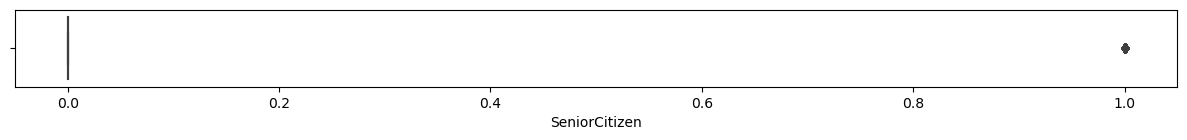

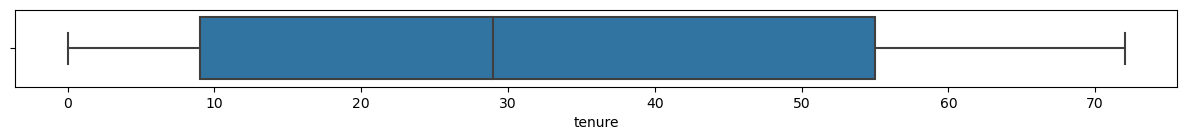

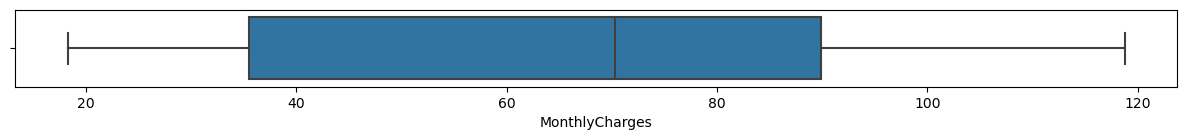

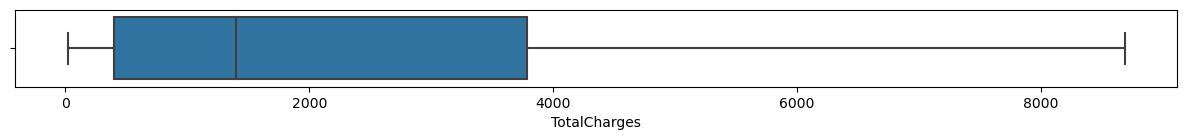

In [21]:
#using boxplot to verify the presence of outliers
# using the for loop  and sns.boxplot method to plot all 4 numeric features boxplots
for column in data:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=data, x=column,)
    plt.show
# comment: outliers are clearly not visible in the boxplot

In [22]:
# using statistical (quantile) method to check for outliers
# checking for the q1 and q3 values of df['Seniorcitizen', 'Totalcharges', 'Monthlycharges', 'tenure']

q1=df.quantile(0.25)
q3=df.quantile(0.75)
print(q1,q3)
# Obeservation: SeniorCitizen has no quantile values

SeniorCitizen       0.000
tenure              9.000
MonthlyCharges     35.500
TotalCharges      402.225
Name: 0.25, dtype: float64 SeniorCitizen        0.00
tenure              55.00
MonthlyCharges      89.85
TotalCharges      3786.60
Name: 0.75, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_1212\2748223958.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=df.quantile(0.25)
C:\Users\USER\AppData\Local\Temp\ipykernel_1212\2748223958.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=df.quantile(0.75)


In [23]:
#computing the interquartile range of the numeric columns
IQR=q3-q1
print(IQR)

SeniorCitizen        0.000
tenure              46.000
MonthlyCharges      54.350
TotalCharges      3384.375
dtype: float64


In [24]:
#using IQR to find the lower and upper limits
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print(lower_limit, upper_limit)

#observations: comparing these limits to the values in df['tenure', 'TotalCharges', 'MonthlyCharges'], we can conclude that there are no outliers in these columns.

SeniorCitizen        0.0000
tenure             -60.0000
MonthlyCharges     -46.0250
TotalCharges     -4674.3375
dtype: float64 SeniorCitizen        0.0000
tenure             124.0000
MonthlyCharges     171.3750
TotalCharges      8863.1625
dtype: float64


# Section 2(c) Drawing Countplot for Categorical Features

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


<Axes: xlabel='PaymentMethod', ylabel='count'>

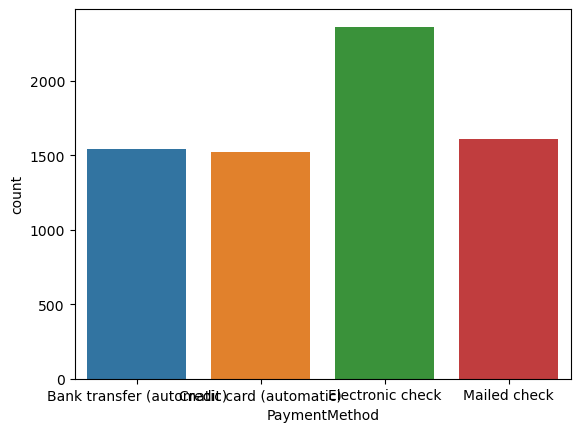

In [25]:
#drawing countplot for some of the 17 categorical features in the dataset
# drawing countplot for Unvariate Distribution
print(df['PaymentMethod']. value_counts())

#variable on x-axis and count on y-axis
sns.countplot(x='PaymentMethod' , data=df)

# observations: this plot shows that most customers pay bills electronically and least on credit card.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<Axes: xlabel='Contract', ylabel='count'>

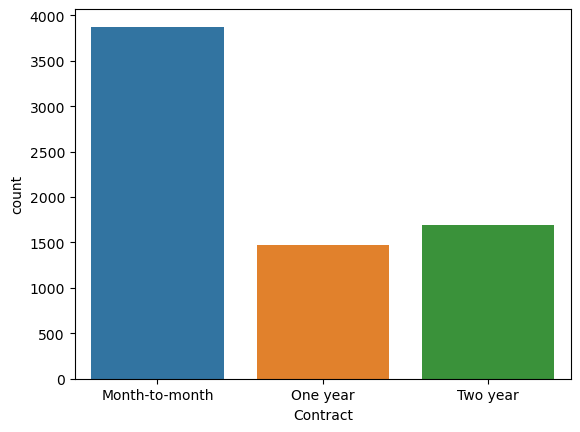

In [26]:
#checking for df['Contract'] value count()

print(df['Contract']. value_counts())

# univariate distribution of the countplot of df['Contract']
sns.countplot(x='Contract', data=df)

#observation: The plot shows that most customers are on the monthly contract and few on 1-year contract.

No     4933
Yes    2110
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

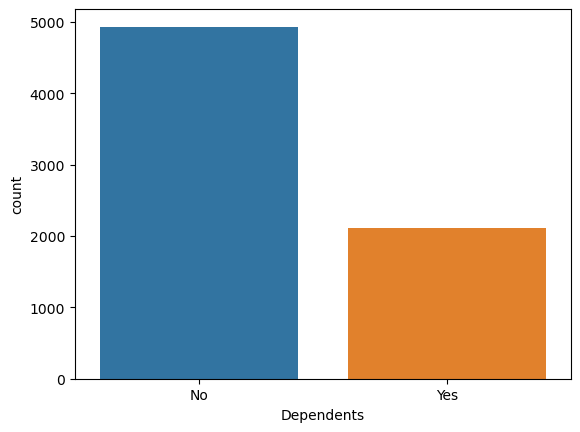

In [27]:
#countplot for df['Dependents']
print(df['Dependents']. value_counts())
sns.countplot(x='Dependents', data=df)

#observation:The plot shows that not many customers seem to have dependents 

<Axes: xlabel='PhoneService', ylabel='count'>

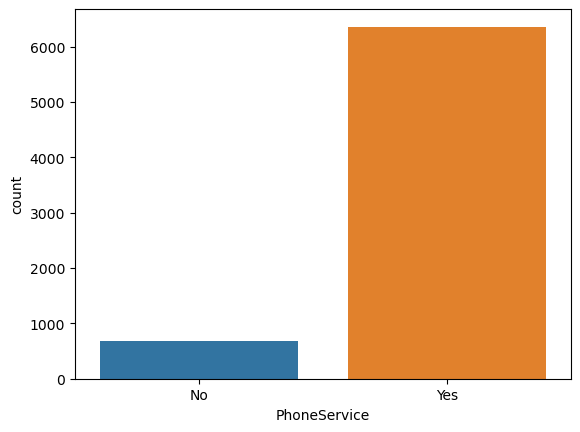

In [28]:
#countplot for PhoneServices
sns.countplot(x='PhoneService', data=df)

#observation: most of the customers have phoneservice.

<Axes: xlabel='gender', ylabel='count'>

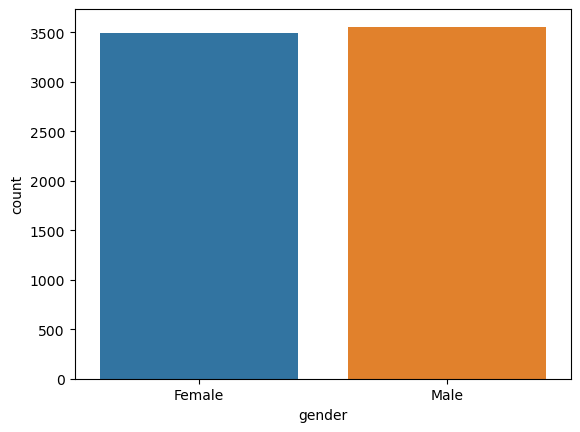

In [29]:
#countplot for Gender column
sns.countplot(x='gender', data=df)

#observation:the distribution shows that the proportion of male and female customers are relatively equal.

No     5174
Yes    1869
Name: Churn, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

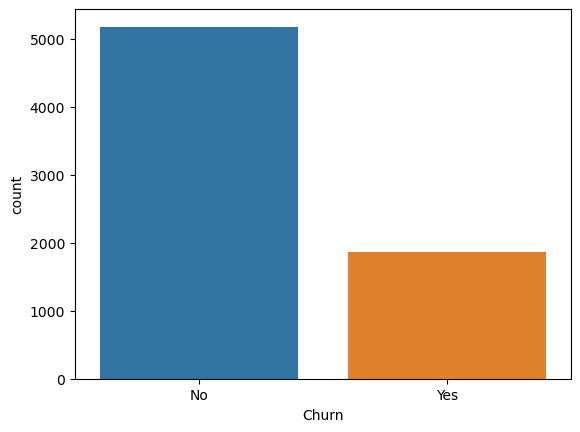

In [30]:
# distribution of dependent variable, churn
print(df['Churn'].value_counts())

sns.countplot(x='Churn', data=df)
# OBSERVATION: The distribution shows that higher percent of customers are active, the churn rate is low and the value_counts() shows that the given dataset is a classification problem.

## Section 2(d) Computing Skewness, Histogram for Numeric Features

In [31]:
#describing numeric features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.295801,64.745377,2283.300200
std,0.368612,24.514291,30.081242,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.300000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


0.24566750731174117

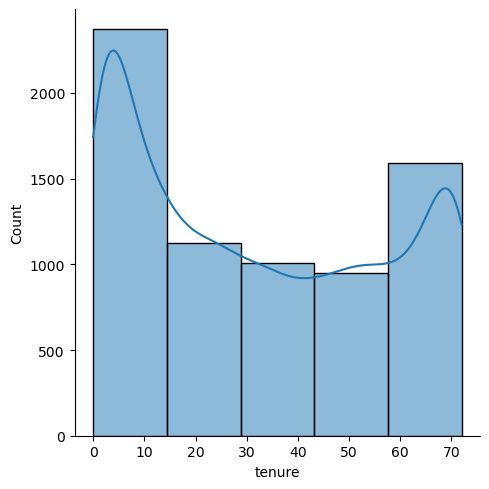

In [32]:
#using sns.displot to draw the histogram
#for df['tenure']
sns.displot(data=df, x='tenure', bins=5, kde=True)
(df['tenure'].skew())
# observation: df['tenure'] distribution is positively(rightly) skewed and the skewness value is moderate


0.9623943417025398

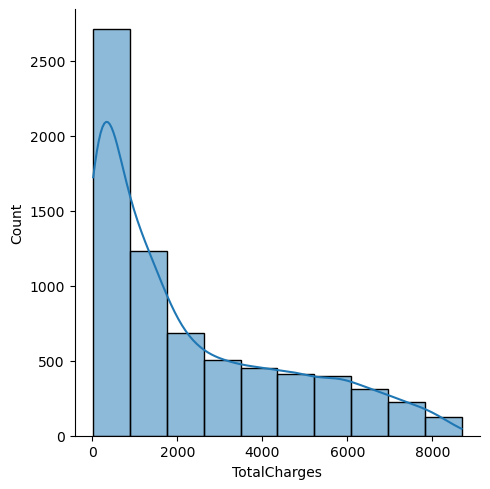

In [33]:
# drawing histogram for df['TotalCharges'] and checking for skewness
sns.displot(data=df, x='TotalCharges', bins=10, kde=True)
df['TotalCharges'].skew()

#observation: the distribution of df['TotalCharges'] is postively skewed to the right and the skewness value is moderate.


-0.745402216489586


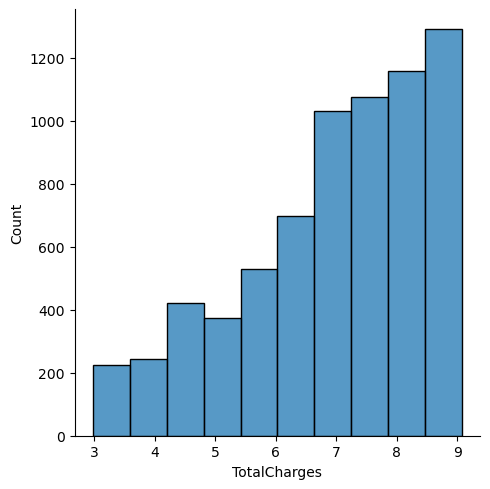

In [34]:
# applying transformation function(np.log) to df['Totalcharges']
TotalCharges_log=np.log(df.TotalCharges+1)
print(TotalCharges_log.skew())
sns.displot(x=TotalCharges_log, bins=10)
#observation:applying transformation makes it to be skewed toward the left

-0.21978171696791607

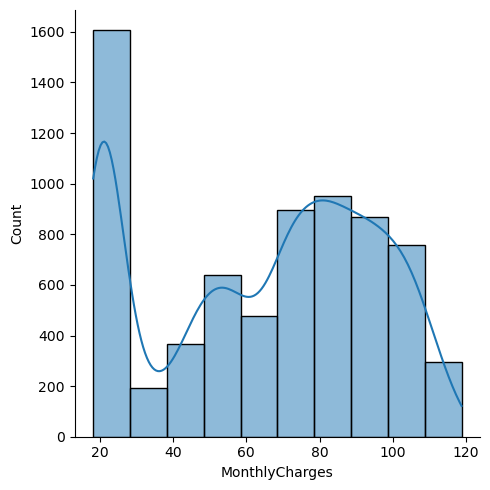

In [35]:
# drawing histogram for df['MontlyCharges'] and computing for skewness
sns.displot(data=df, x='MonthlyCharges', bins=10, kde=True)
df['MonthlyCharges'].skew()
# observation: df['MonthlyCharges'] is skewed towards the right and the skewness value is moderate

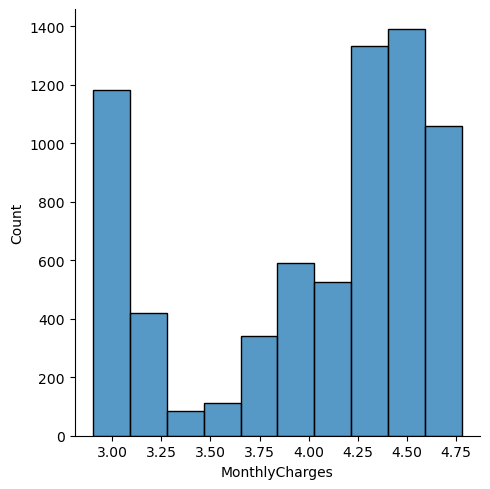

In [36]:
#applying transformation to df['MonthlyCharges']
df['MonthlyCharges']= np.log(df['MonthlyCharges'])
sns.displot(data=df, x='MonthlyCharges', bins=10)

1.833632744092857

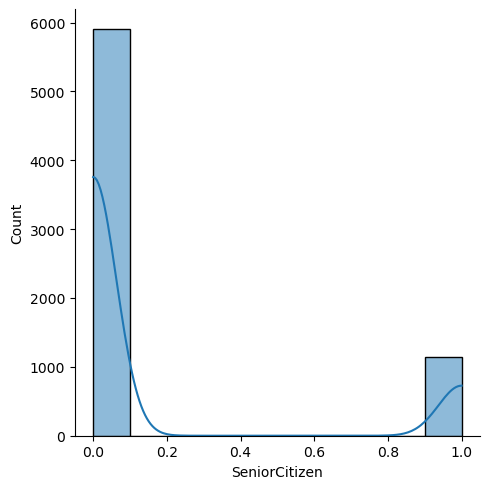

In [37]:
#drawing histogram for df['SeniorCitizen']
sns.displot(data=df, x='SeniorCitizen', bins=10, kde=True)
df['SeniorCitizen'].skew()

# OBSERVATION: the distribution of df['Seniorcitizen'] is positvely skewed to the right.

1.833632744092856


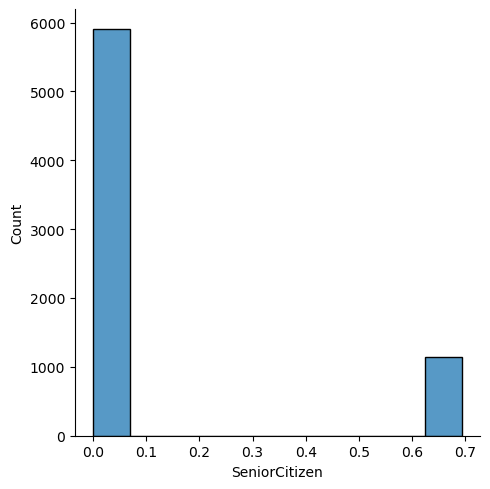

In [38]:
#applying transformation function to the skewness of SeniorCitizen
SeniorCitizen_log= np.log(df.SeniorCitizen + 1)
print(SeniorCitizen_log.skew())
sns.displot(x=SeniorCitizen_log, bins=10)

## Section 3(a) Computing Correlation  and Demonstrating Using Heatmap

In [39]:
# computing correlation among independent numeric features
data= df[['SeniorCitizen', 'tenure', 'TotalCharges', 'MonthlyCharges']]
df1=data.corr()
print(df1)

# observation: TotalCharges have the highest correlation with tenure.

                SeniorCitizen    tenure  TotalCharges  MonthlyCharges
SeniorCitizen        1.000000  0.017047      0.102395        0.216453
tenure               0.017047  1.000000      0.823867        0.196586
TotalCharges         0.102395  0.823867      1.000000        0.583944
MonthlyCharges       0.216453  0.196586      0.583944        1.000000


<Axes: >

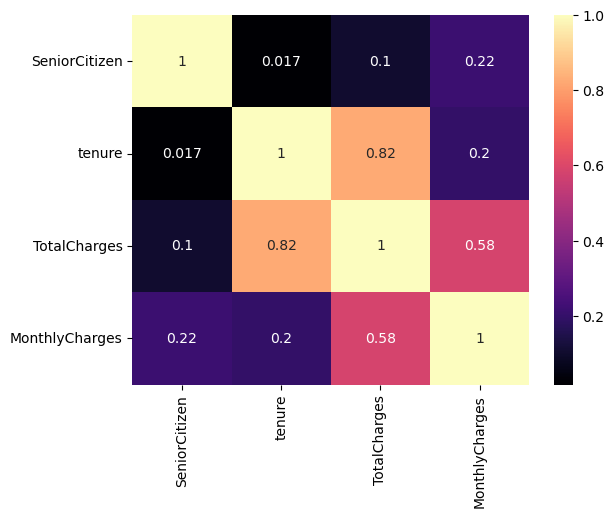

In [40]:
#demonstrating the correlation using heatmap
sns.heatmap(df1, annot=True, cmap='magma')
# observation: the heatmap shows that tenure is highly correlated with Totalcharges

## Section 3(b) Scatterplot of Numeric features

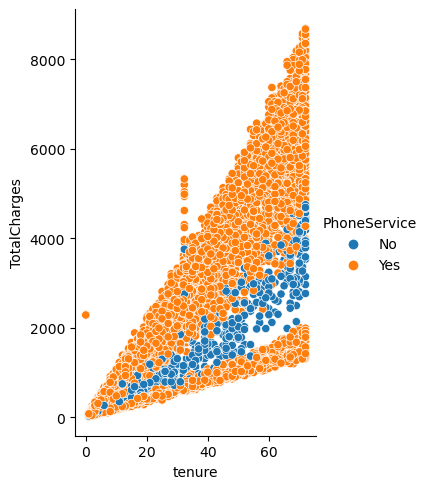

In [41]:
# Scatter plot for checking the relationship between numeric features using the sns.relplot method and applying hue parameter of cateforical features
#scatter plot between tenure and Totalcharges
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='PhoneService',aspect=0.7)

#OBSERVATION: The plot shows that as Totalcharges increases, tenure also increases and most customers are on phoneservice.

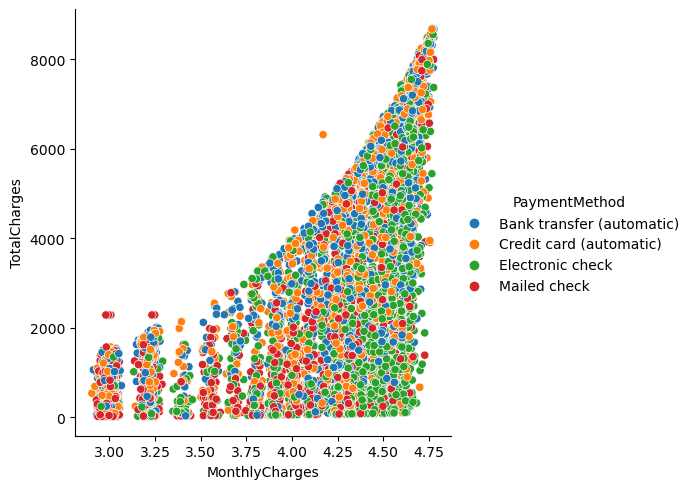

In [42]:
#scatter plot between totalcharges and mothlycharges
sns.relplot(df, x='MonthlyCharges', y='TotalCharges', aspect=1, hue='PaymentMethod')

#observation: the plot shows that most customers are on the electric paymentmethod and totalcharges increases with monthlycharges 

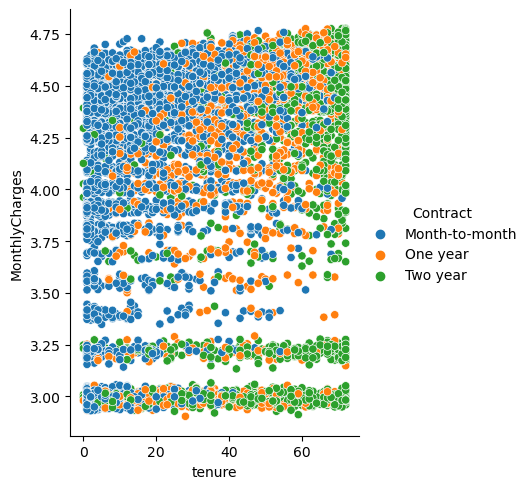

In [43]:
#scatter plot between tenure and monthlycharges
sns.relplot(df, x='tenure', y='MonthlyCharges', aspect=0.8, hue='Contract')

#observation: the plot shows that most customers are on the monthly subscription plan and monthlycharges tend to increase with tenure.

## Section 3(c) Applying Feature Scaling Method to Numeric Independent Features

In [44]:
#Applying Scaling to numerical features using the MinMaxScaler
#importing MinMaxscaler from SKlearn.Preprocessing
from sklearn.preprocessing import MinMaxScaler

# geting the min() and max() of numeric features
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].max(), df[['tenure', 'MonthlyCharges', 'TotalCharges']].min())


tenure              72.00000
MonthlyCharges       4.77702
TotalCharges      8684.80000
dtype: float64 tenure             0.000000
MonthlyCharges     2.904165
TotalCharges      18.800000
dtype: float64


In [45]:
# using MinMaxScaler for min() max() scaling of numeric features(df[['tenure', 'Monthlycharges', 'TotalCharges']])
scaler= MinMaxScaler(feature_range=(1,2))

df2= df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# using the fit_transform() method
df2_scaled=scaler.fit_transform(df2)
print(df2_scaled)
print(type(df2_scaled)) 
# Oservation: values are scaled in the range of 1 and 2 and the type is a numpy array

[[1.01388889 1.26271103 1.0012751 ]
 [1.47222222 1.60763294 1.21586661]
 [1.02777778 1.5777474  1.01031041]
 ...
 [1.13888889 1.5333125  1.05272329]
 [1.97222222 1.71165975 1.56006808]
 [1.23611111 1.06854836 1.04609393]]
<class 'numpy.ndarray'>


In [46]:
#geting dataframe of scaled columns
df2_scaled_df=pd.DataFrame(df2_scaled, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
print(df2_scaled_df)

        tenure  MonthlyCharges  TotalCharges
0     1.013889        1.262711      1.001275
1     1.472222        1.607633      1.215867
2     1.027778        1.577747      1.010310
3     1.625000        1.448845      1.210241
4     1.027778        1.723110      1.015330
...        ...             ...           ...
7038  1.055556        1.750347      1.033210
7039  1.916667        1.937588      1.787641
7040  1.138889        1.533313      1.052723
7041  1.972222        1.711660      1.560068
7042  1.236111        1.068548      1.046094

[7043 rows x 3 columns]


In [47]:
#Replacing df[['tenure','Monthlycharges', 'Totalcharges']] with scaled columns
df[['tenure', 'MonthlyCharges', 'TotalCharges']]=df2_scaled
df.head()
# Observation: The scaled values have replaced the values of these columns

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.013889,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,1.262711,1.001275,No
1,5575-GNVDE,Male,0,No,No,1.472222,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,1.607633,1.215867,No
2,3668-QPYBK,Male,0,No,No,1.027778,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.577747,1.010310,Yes
3,7795-CFOCW,Male,0,No,No,1.625000,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1.448845,1.210241,No
4,9237-HQITU,Female,0,No,No,1.027778,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,1.723110,1.015330,Yes


## Section 4 Converting Categorical Features to Numeric Features using Encoding Technique

In [48]:
# categorical columns are coverted to numeric features using Label Encoding  
#  first,  'CustomerID' needs to be droped since it has no signigicant effect to dataset in performing encoding and correlation
df.drop(df.columns[0:1], axis=1, inplace=True)

In [49]:
# Revalidating droped column
df
# Observation: customerID have been droped and the data now has 7043 rows and 20 columns.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1.262711,1.001275,No
1,Male,0,No,No,1.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1.607633,1.215867,No
2,Male,0,No,No,1.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1.577747,1.010310,Yes
3,Male,0,No,No,1.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1.448845,1.210241,No
4,Female,0,No,No,1.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1.723110,1.015330,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,1,Yes,No,1.055556,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1.750347,1.033210,Yes
7039,Male,0,No,No,1.916667,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),1.937588,1.787641,No
7040,Male,0,Yes,Yes,1.138889,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,1.533313,1.052723,No
7041,Female,0,Yes,Yes,1.972222,Yes,Yes,DSL,Yes,Yes,No,No,Yes,No,Two year,Yes,Credit card (automatic),1.711660,1.560068,No


In [50]:
# Importing LabelEncoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [51]:
# Using for loop to get independent categorical features with unique() values >2
for x in df.columns[0:]:
    if df[x].dtype=='category':
        if len(list(df[x].unique()))>2:
          print(x)
# Observation: There are 10 independent columns with unique values more than 2

MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaymentMethod


In [52]:
#performing encoding using the fit transform method of labelEncoding for the 10 columns
mul=LabelEncoder()

labes=[0,1,2] #(NO, YES, No internetservice)
df['MultipleLines']=mul.fit_transform(df['MultipleLines'])
df['InternetService']=mul.fit_transform(df['InternetService'])
df['OnlineSecurity']=mul.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=mul.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=mul.fit_transform(df['DeviceProtection'])
df['TechSupport']=mul.fit_transform(df['TechSupport'])
df['StreamingTV']=mul.fit_transform(df['StreamingTV'])
df['StreamingMovies']=mul.fit_transform(df['StreamingMovies'])

df['Contract']=mul.fit_transform(df['Contract']) # unique values in 'contact' are (month to month, one year, two years)

# paymentmethod has 4 labels
labels=[0,1,2,3] #  unique values are(Bank transfer, credit card, electronic check, mailed check)
df['PaymentMethod']=mul.fit_transform(df['PaymentMethod'])
print(df)
# Observation: paymentmethod has the highest number of labels(4), all others have 3 

      gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
0     Female              0     Yes         No  1.013889           No   
1       Male              0      No         No  1.472222          Yes   
2       Male              0      No         No  1.027778          Yes   
3       Male              0      No         No  1.625000           No   
4     Female              0      No         No  1.027778          Yes   
...      ...            ...     ...        ...       ...          ...   
7038    Male              1     Yes         No  1.055556          Yes   
7039    Male              0      No         No  1.916667          Yes   
7040    Male              0     Yes        Yes  1.138889          Yes   
7041  Female              0     Yes        Yes  1.972222          Yes   
7042  Female              0     Yes        Yes  1.236111          Yes   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0 

In [53]:
# Applying fit_transform() method of labelEncoding on the categorical columns (6) with unique values = 2
mul=LabelEncoder()
labels=[0,1] # (NO,YES)

df['PaperlessBilling']=mul.fit_transform(df['PaperlessBilling'])
df['PhoneService']= mul.fit_transform(df['PhoneService'])
df['gender']=mul.fit_transform(df['gender'])
df['Dependents']=mul.fit_transform(df['Dependents'])
df['Partner']=mul.fit_transform(df['Partner'])
df['Churn']=mul.fit_transform(df['Churn'])

print(df)


      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          0              0        1           0  1.013889             0   
1          1              0        0           0  1.472222             1   
2          1              0        0           0  1.027778             1   
3          1              0        0           0  1.625000             0   
4          0              0        0           0  1.027778             1   
...      ...            ...      ...         ...       ...           ...   
7038       1              1        1           0  1.055556             1   
7039       1              0        0           0  1.916667             1   
7040       1              0        1           1  1.138889             1   
7041       0              0        1           1  1.972222             1   
7042       0              0        1           1  1.236111             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                

In [54]:
# verifying data types after performimg label encoding
df.dtypes
# Observation: All categorical columns have been converted to integers

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure              float64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [55]:
# checking data to confirm encoding
df
# Observation: All columns are now in numeric form

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.013889,0,1,0,0,2,0,0,0,0,0,1,2,1.262711,1.001275,0
1,1,0,0,0,1.472222,1,0,0,2,0,2,0,0,0,1,0,3,1.607633,1.215867,0
2,1,0,0,0,1.027778,1,0,0,2,2,0,0,0,0,0,1,3,1.577747,1.010310,1
3,1,0,0,0,1.625000,0,1,0,2,0,2,2,0,0,1,0,0,1.448845,1.210241,0
4,0,0,0,0,1.027778,1,0,1,0,0,0,0,0,0,0,1,2,1.723110,1.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,1.055556,1,2,1,0,0,0,0,0,0,0,1,3,1.750347,1.033210,1
7039,1,0,0,0,1.916667,1,0,1,2,0,2,2,2,2,2,1,0,1.937588,1.787641,0
7040,1,0,1,1,1.138889,1,0,0,0,2,0,0,0,0,1,0,3,1.533313,1.052723,0
7041,0,0,1,1,1.972222,1,2,0,2,2,0,0,2,0,2,1,1,1.711660,1.560068,0


# Section 3(d) Computing Correlation of Each Independent Feature with 'Churn' ( Trained Data)

In [56]:
# seperating dependent feature and independent features
# let y represent dependent feature and x set of all independent features
y=df['Churn']
x= df.drop(['Churn'], axis=1)
print(y.shape, type(y))
print(x.shape, type(x))

#Observation: There are now 7043 rows and 19 columns, y type is series while x is a dataframe.


(7043,) <class 'pandas.core.series.Series'>
(7043, 19) <class 'pandas.core.frame.DataFrame'>


In [57]:
print(x.columns)
# observation: x contain 19 columns with customer id excluded

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [58]:
# spliting the data into train and test data
#importing train_test_split method from sklearn library
from sklearn.model_selection import train_test_split


In [59]:
# The data is a SUPERVISED CLASSIFICATION PROBLEM so STRATIFIED parameter is used to achieve proprtional sampling of both classes in train and test
# using 90% for training and 10% for testing and using the random_state function to generate the same results.
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=30, test_size=0.1, stratify=y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# Observation: The output contain equal proportion for both train and test classes

(6338, 19)
(6338,)
(705, 19)
(705,)


In [60]:
# Checking for tail severally to confirm random_state
x_train.head(3)
# observation: The same output is gotten with the use of random_state

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4151,1,0,0,0,1.083333,1,2,1,0,0,0,0,0,0,0,1,2,1.753923,1.052042
1571,0,0,0,1,1.208333,1,0,2,1,1,1,1,1,1,1,0,3,1.039465,1.029056
4745,1,0,0,0,1.305556,1,0,2,1,1,1,1,1,1,1,0,1,1.056841,1.051737


In [61]:
# since its a classification problem we check for value counts()
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())
#Observation: The value_counts() shows that the rate of active customers are more than those that are inactive and the data indeed is a  supervised classification. 

0    5174
1    1869
Name: Churn, dtype: int64
0    4656
1    1682
Name: Churn, dtype: int64
0    518
1    187
Name: Churn, dtype: int64


In [62]:
#  Using Pearson Correlation Coefficient to compute the correlation of each x trained data with y trained
# selecting  7 features
features=7
corr_with_churn=x_train.corrwith(y_train)
print(corr_with_churn)

gender             -0.011831
SeniorCitizen       0.158580
Partner            -0.155683
Dependents         -0.170750
tenure             -0.353248
PhoneService        0.015050
MultipleLines       0.033808
InternetService    -0.043063
OnlineSecurity     -0.287966
OnlineBackup       -0.198297
DeviceProtection   -0.176853
TechSupport        -0.284109
StreamingTV        -0.044003
StreamingMovies    -0.035532
Contract           -0.397040
PaperlessBilling    0.185613
PaymentMethod       0.106669
MonthlyCharges      0.209284
TotalCharges       -0.200153
dtype: float64


In [63]:
# arrangeing the correlation in a decending order
decend_order=corr_with_churn.sort_values(ascending=False)
print(decend_order)
#Observation: MonthlyCharges has the highest correlation with target variable(Churn). So, customers on the monthly subscription are likely to have the highest churn rate.

MonthlyCharges      0.209284
PaperlessBilling    0.185613
SeniorCitizen       0.158580
PaymentMethod       0.106669
MultipleLines       0.033808
PhoneService        0.015050
gender             -0.011831
StreamingMovies    -0.035532
InternetService    -0.043063
StreamingTV        -0.044003
Partner            -0.155683
Dependents         -0.170750
DeviceProtection   -0.176853
OnlineBackup       -0.198297
TotalCharges       -0.200153
TechSupport        -0.284109
OnlineSecurity     -0.287966
tenure             -0.353248
Contract           -0.397040
dtype: float64


In [64]:
# Selecting 7 most important features from the set of indepndent features
important_features= corr_with_churn.sort_values(ascending=False).head(features).index.tolist()
print(important_features)
#Conclusion: The features in the given output has the most important effect on churn rate. And so special attention should be given to these features in other to reduce the churn rate.

['MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'PaymentMethod', 'MultipleLines', 'PhoneService', 'gender']


##  Section 5  Using SelectKBest Method to Reduce  Features to 7

In [65]:
# This is the Chi_Squared method
# The given dataset is a supervised classification so we use the SelectKBest, f_classif and mutual_info_classif method from the sklearn library
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif

In [66]:
# selecting the 7 features
best_features= SelectKBest(f_classif, k=7)
best_features.fit(x_train, y_train)
print(x_train.columns[best_features.get_support()])


best_features=SelectKBest(mutual_info_classif, k=7)
best_features.fit(x_train, y_train)
print(x_train.columns[best_features.get_support()])
#Oservation: 'tenure', 'onlinesecurity', 'onlinebackup', 'Techsupport', 'contract', 'monthlycharges' and 'Totalcharges' are the 7 kBest features and these features have effect on the churn rate.


Index(['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Index(['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport',
       'Contract', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')
